# Logistic Regression model 

Import all required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (
    classification_report,
    f1_score,
    accuracy_score,
    confusion_matrix,
)

Reading the updated version of data

In [2]:
data = pd.read_csv("../Data/processed_data.csv")

In [3]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,29.85,29.85,0,True,False,False,False,False,True,False
1,1,0,0,0,34,0,1,0,1,0,...,56.95,1889.50,0,True,False,False,False,False,False,True


---------------------------------------------------------
## Data Augmentation then splitting the data

---------------------------------------------------------

In [4]:
x = data.drop(["Churn"], axis=1)
y = data["Churn"]

print("\nBefore SMOTE:")
print(y.value_counts())
print(y.value_counts(normalize=True)*100)
print('-'*40)

smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)
print("\nAfter SMOTE:")
print(y.value_counts())


Before SMOTE:
Churn
0    5165
1    1857
Name: count, dtype: int64
Churn
0    73.554543
1    26.445457
Name: proportion, dtype: float64
----------------------------------------

After SMOTE:
Churn
0    5165
1    5165
Name: count, dtype: int64


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

---------------------------------------------------------
## Fitting the model, hyperparameter Tuning, and cross-validation

---------------------------------------------------------

In [6]:
# # Logistic regression
# logreg = LogisticRegression(random_state=42)

# param_grid = {
#     "C": [0.01, 0.1, 1, 10, 100],
#     "solver": ["liblinear", "saga"],
#     "class_weight": [None, {0: 1, 1: 5}, "balanced"],
#     "max_iter": [100, 200, 500],
# }


# grid_search = GridSearchCV(
#     estimator=logreg,
#     param_grid=param_grid,
#     cv=5,
#     scoring="f1_weighted",
#     verbose=1,
#     n_jobs=-1,
# )
# # 
# grid_search.fit(x_train, y_train)

# best_model = grid_search.best_estimator_
# y_prob = best_model.predict_proba(x_test)[:, 1]


# custom_threshold = 0.35
# y_pred_custom = (y_prob >= custom_threshold).astype(int)
# print("Best Parameters:", grid_search.best_params_)

### Commented the tuning and cross-validation cell after getting the best parameters then used it in the model 

In [7]:
best_model = LogisticRegression(random_state=42, C= 10, class_weight='balanced', max_iter= 100, solver= 'liblinear')
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

best_model.fit(x_train, y_train)
y_prob = best_model.predict_proba(x_test)[:, 1]
custom_threshold = 0.35
y_pred_custom = (y_prob >= custom_threshold).astype(int)

In [ ]:
# create data frame of the y_test and y predicted

df = pd.DataFrame({"Y_Actual": y_test, "Y_Predicted": y_pred_custom})
df.head(30)

,Y_Actual,Y_Predicted
8686,1,1
6087,1,1
765,0,1
4868,0,0
562,0,0
6978,1,0
39,1,1
1597,1,1
8174,1,1
7750,1,1


In [8]:
print("\nClassification Report with Custom Threshold:")
print(classification_report(y_test, y_pred_custom))

f1 = f1_score(y_test, y_pred_custom, average="weighted")
print(f"Weighted F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_custom):.2f}")


Classification Report with Custom Threshold:
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1552
           1       0.77      0.93      0.84      1547

    accuracy                           0.83      3099
   macro avg       0.84      0.83      0.82      3099
weighted avg       0.84      0.83      0.82      3099

Weighted F1-Score: 0.82
Accuracy: 0.83


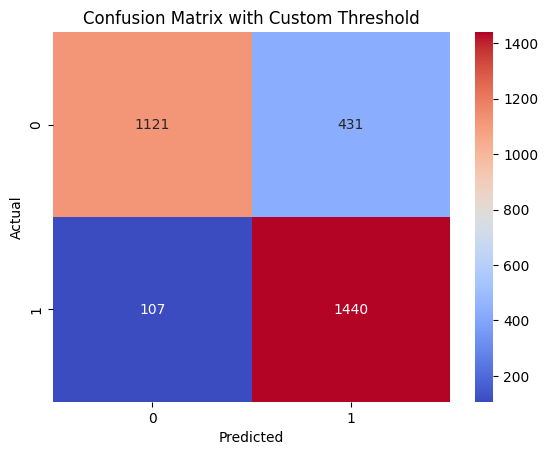

In [9]:
cm = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with Custom Threshold")
plt.show()